In [36]:
import ROOT
import numpy as np
from array import *
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colors 
import dunestyle.matplotlib as dunestyle
import math
import pandas as pd

In [37]:
def resultsTOtxt(arr,  filename):
#arr is the concatenated and transposed array of all the arrays wished to be written
#arrDescription a string describing and is each collumn of the file
#writes out each array concatenated in arr as an collumn in the file
    file = open(filename, 'w')
    np.savetxt(filename, arr, delimiter=' ')
    file.close()
    
def GetNpArraysFromTrees(tree, branch_name):
    estimate = 3e6 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), dtype=np.float64, count=result_hist))
    result = result.copy()
    return result

def GetNpArraysFromTrees2(tree, branch_name):
    estimate = 3e8 #amount of numbers getting from branch
    tree.SetEstimate(int(estimate))
    result_hist = tree.Draw(branch_name, "", "goff")
    result = np.asarray(np.frombuffer(tree.GetV1(), count=result_hist))
    result = result.copy()
    return result

In [38]:
path = '/media/leoperes/Acer/Users/le0_p/'

In [39]:
def ReadNuclearModelSamples():
    fAtm_00a = ROOT.TFile.Open(path+'ntuples_grid_newVertex/00a_newVertex/atm_hA_BR.root')
    return fAtm_00a

In [40]:
list_nuclearmodels = ['hA_BR','hA_LSF', 'hA_ESF', 'hN_BR', 'hN_LFG', 'hN_ESF']

In [41]:
def vec_mod(arr):
    return math.sqrt(arr[0]**2+arr[1]**2+arr[2]**2)

In [42]:
FluxRotValues = np.array([[+0.9877, -0.1564, +0.0000],  # new x axis in old coordinates: be nice and fix things (ends up the same)
                        [+0.0000, +0.0000, +1.0000],  # new y axis in old coordinates: vertical
                        [-0.1564, -0.9877, +0.0000]])   # new z axis in old coordinates: away from Batavia, IL

Inverse_FluxRotValues = np.linalg.inv(FluxRotValues)

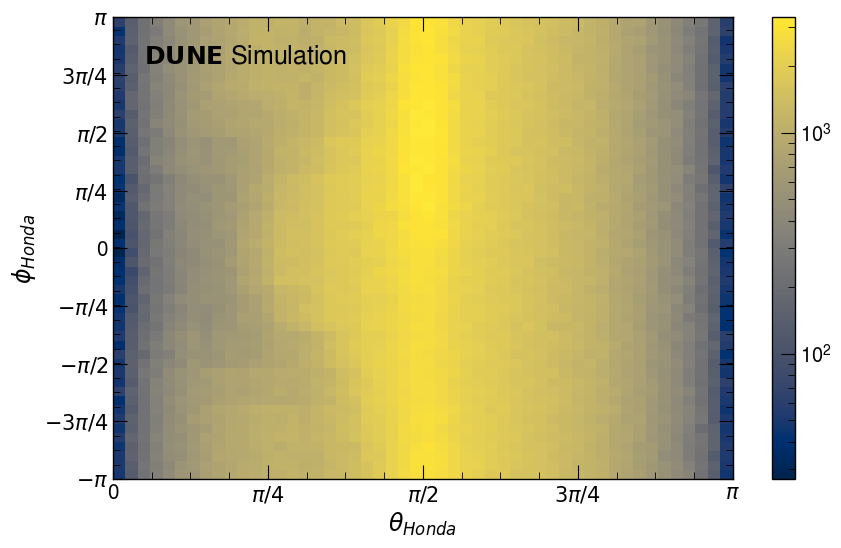

In [43]:

infile = ReadNuclearModelSamples()
intree_reco = infile.Get("ana/Atm")
intree_simu = infile.Get("ana/AllEvents") 
reco_entries = intree_reco.GetEntries() 

    
MCNuMomentum = GetNpArraysFromTrees2(intree_reco,"MCNuMomentum") 
NuMom_True = MCNuMomentum.reshape(reco_entries,3) 

NuMom_True_Unit = [Inverse_FluxRotValues.dot(evt/vec_mod(evt)) for evt in NuMom_True]
plot_dirdetc_nu = []
Phi_Theta_NuMom_Unit = [plot_dirdetc_nu.append((math.atan2(nu[1], nu[0]), math.acos(nu[2]))) for nu in NuMom_True_Unit]
plot_dirdetc_nu = np.array(plot_dirdetc_nu)
    
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))

h = ax.hist2d(plot_dirdetc_nu[:,1],plot_dirdetc_nu[:,0], bins = (50,50),  norm = colors.LogNorm(), label = ' # Events')
ax.set_xlabel(r'$\theta_{Honda}$', fontsize = 17)
ax.set_ylabel(r'$\phi_{Honda}$', fontsize = 17)
#plt.title('Atmospheric Neutrinos True Direction in Geographical Coordinates (Honda Flux)')
ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
fig.colorbar(h[3], ax=ax)
dunestyle.Simulation()
#plt.title('Atmospherics_'+list_nuclearmodels[SAMPLE_INDEX])
#plt.savefig('AngularStudiesPlots/DirectionDetector_Atmospherics_HondaCoordSys_AllModels.pdf', format='pdf', dpi=300)
#plt.savefig('AngularStudiesPlots/DirectionDetector_Atmospherics_HondaCoordSys_AllModels.png', format='png', dpi=300)
plt.show()


In [44]:
simu_entries = intree_simu.GetEntries() 
MCNuMomentum_all = GetNpArraysFromTrees2(intree_simu,"MCNuMomentum") 
NuMom_True_all = MCNuMomentum_all.reshape(simu_entries,3) 

NuMom_True_Unit_all = [Inverse_FluxRotValues.dot(evt/vec_mod(evt)) for evt in NuMom_True_all]
plot_dirdetc_nu_all = []
Phi_Theta_NuMom_Unit_all = [plot_dirdetc_nu_all.append((math.atan2(nu[1], nu[0]), math.acos(nu[2]))) for nu in NuMom_True_Unit_all]
plot_dirdetc_nu_all = np.array(plot_dirdetc_nu_all)

In [66]:
np.savetxt("samples_theta_reco.txt",plot_dirdetc_nu[:,1])
np.savetxt("samples_theta_all.txt",plot_dirdetc_nu_all[:,1])

In [46]:
np.cos(plot_dirdetc_nu[:,1])

array([-0.55157691, -0.07628825,  0.16203267, ...,  0.54416554,
       -0.19179064, -0.73384244])

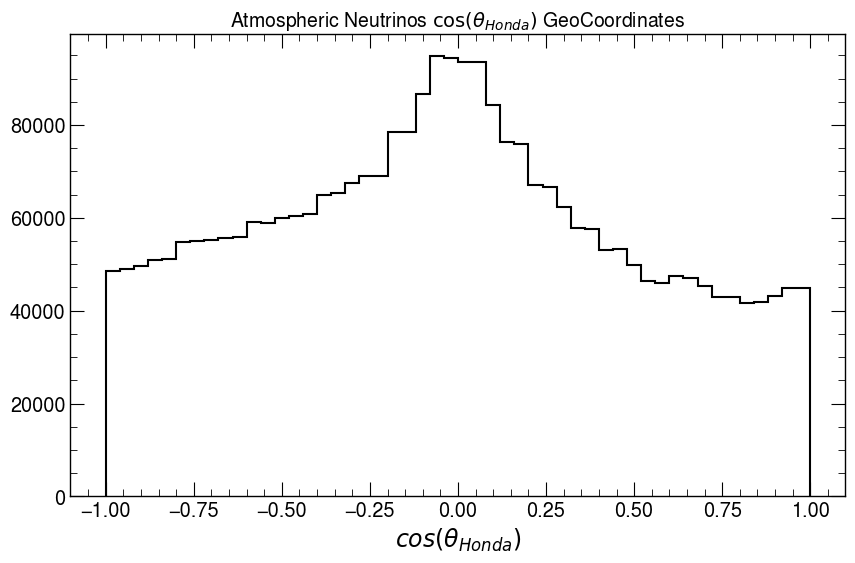

In [47]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
ax.hist(np.cos(plot_dirdetc_nu[:,1]), bins = 50, label = ' # Events', histtype='step')
ax.set_xlabel(r'$cos(\theta_{Honda})$', fontsize = 17)
#ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
#ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
#fig.colorbar(h[3], ax=ax)
plt.title(r'Atmospheric Neutrinos $\cos(\theta_{Honda})$ GeoCoordinates', fontsize=14)
#plt.savefig('AngularStudiesPlots/DirectionDetector_Atmospherics_HondaCoordSys_cosTheta.pdf', format='pdf', dpi=300)
#plt.savefig('AngularStudiesPlots/DirectionDetector_Atmospherics_HondaCoordSys_cosTheta.png', format='png', dpi=300)
plt.show()

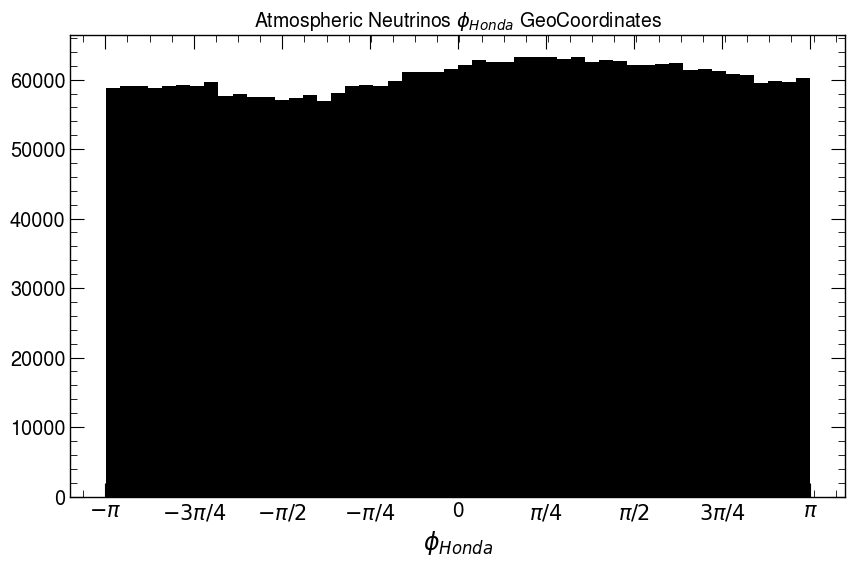

In [48]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
ax.hist(plot_dirdetc_nu[:,0], bins = 50, label = ' # Events')
ax.set_xlabel(r'$\phi_{Honda}$', fontsize = 17)
ax.set_xticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
#fig.colorbar(h[3], ax=ax)
plt.title(r'Atmospheric Neutrinos $\phi_{Honda}$ GeoCoordinates',fontsize=14)
#plt.savefig('AngularStudiesPlots/DirectionDetector_Atmospherics_HondaCoordSys_Phi.pdf', format='pdf', dpi=300)
#plt.savefig('AngularStudiesPlots/DirectionDetector_Atmospherics_HondaCoordSys_Phi.png', format='png', dpi=300)
plt.show()

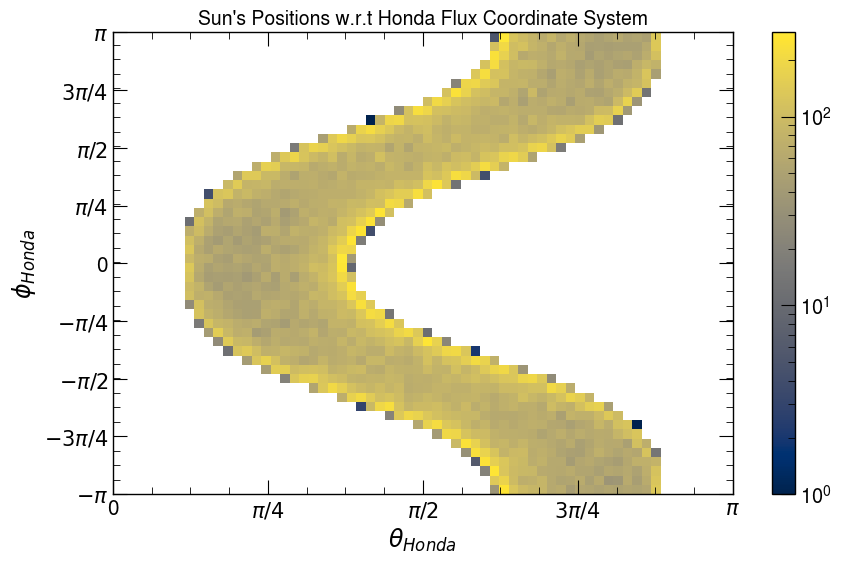

In [49]:
Sun_Positions = np.loadtxt('../../Optimization/background_sun_pos.dat', delimiter='\t', usecols=(0,1,2))
PlotSunDirection = []
SunPosInHondaCoorS = [Inverse_FluxRotValues.dot(SunPos)  for SunPos in Sun_Positions] 
Phi_Theta_NuMom_Unit = [PlotSunDirection.append((math.atan2(SunPos[1], SunPos[0]), math.acos(SunPos[2]))) for SunPos in SunPosInHondaCoorS] 

fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
PlotSunDirection = np.array(PlotSunDirection)
h = ax.hist2d(PlotSunDirection[:,1],PlotSunDirection[:,0], bins = (50,50),  norm = colors.LogNorm(), label = ' # Events')
ax.set_xlabel(r'$\theta_{Honda}$', fontsize = 17)
ax.set_ylabel(r'$\phi_{Honda}$', fontsize = 17)
ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
ax.set_yticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_yticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
fig.colorbar(h[3], ax=ax)
plt.title("Sun's Positions w.r.t Honda Flux Coordinate System", fontsize=14)
#plt.savefig('AngularStudiesPlots/SunPositions_HondaCoordSys.pdf', format='pdf', dpi=300)
#plt.savefig('AngularStudiesPlots/SunPositions_HondaCoordSys.png', format='png', dpi=300)
plt.show()

In [50]:
def cosineAngle_wSphericalUnitVec(a,b):
    return np.sin(a[1])*np.sin(b[1])*np.cos(a[0]-b[0])+np.cos(a[1])*np.cos(b[1])

In [51]:
hist_cos_HondaCoordSys = []
for index, atmevt in enumerate(plot_dirdetc_nu):
    indices = np.random.randint(0, len(PlotSunDirection), size=1)
    # Use the sampled indices to select elements from the array
    sample_sunpos = PlotSunDirection[indices]
    #print(sample_sunpos[0])
    for sunpos in sample_sunpos:
        hist_cos_HondaCoordSys.append(cosineAngle_wSphericalUnitVec(atmevt,sample_sunpos[0]))


        

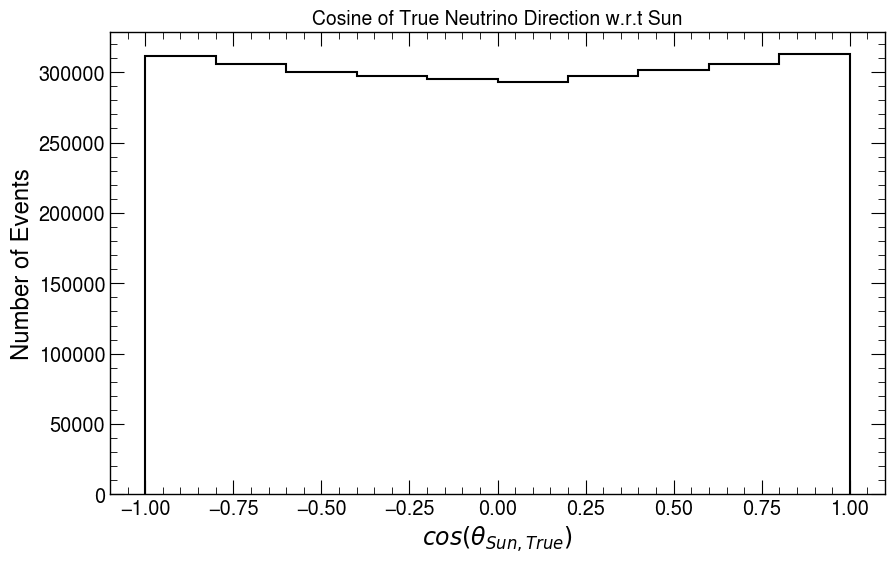

In [52]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
plt.hist(hist_cos_HondaCoordSys, bins = 10,histtype = 'step')
plt.title(r'Cosine of True Neutrino Direction w.r.t Sun', fontsize=14)
plt.ylabel('Number of Events')
plt.xlabel(r'$cos(\theta_{Sun, True})$',fontsize = 17)
#plt.savefig('AngularStudiesPlots/TrueNeutrinoDirection_CosWrtSun.pdf', format='pdf', dpi=300)
#plt.savefig('AngularStudiesPlots/TrueNeutrinoDirection_CosWrtSun.png', format='png', dpi=300)
plt.show()

### Simulates with Honda $\phi$ uniformally distributed ###

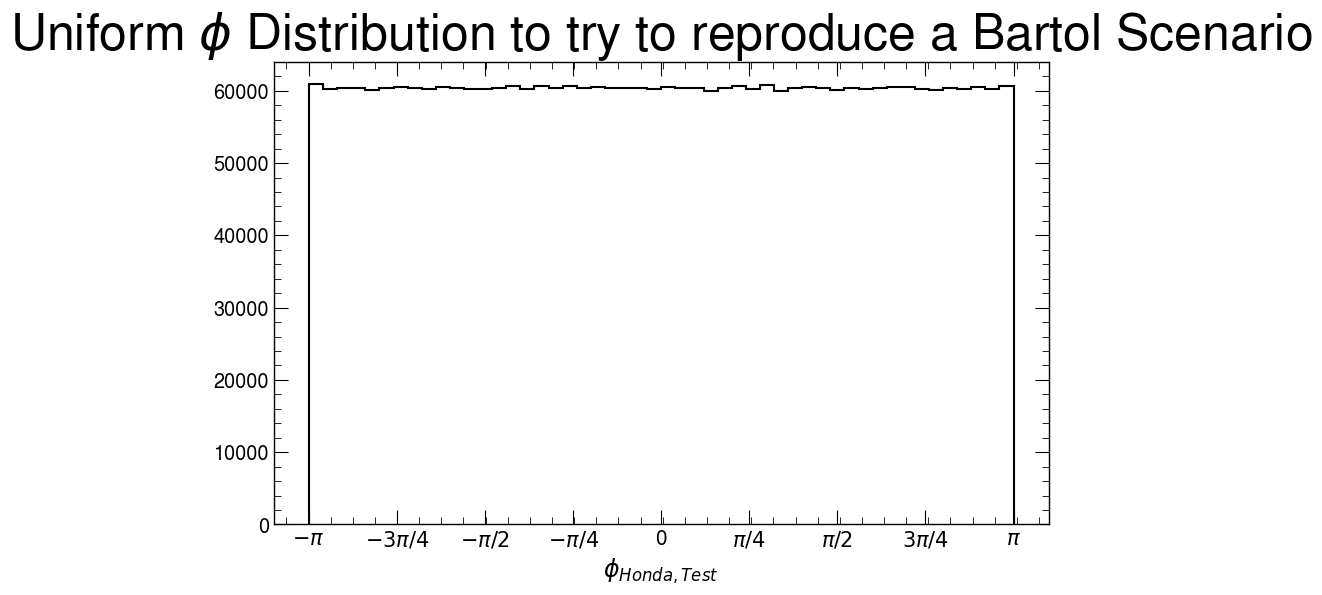

In [53]:
PhiHondaUnif = 2*np.pi*np.random.random_sample((plot_dirdetc_nu[:,0].size,))-np.pi
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
ax.hist(PhiHondaUnif, bins = 50,histtype = 'step')
plt.title(r'Uniform $\phi$ Distribution to try to reproduce a Bartol Scenario')
ax.set_xticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
ax.set_xlabel(r'$\phi_{Honda, Test}$', fontsize = 17)
#plt.savefig('AngularStudiesPlots/UniformPhiTest.pdf', format='pdf', dpi=300)
#plt.savefig('AngularStudiesPlots/UniformPhiTest.png', format='png', dpi=300)
plt.show()

In [54]:
plot_dirdetc_nu_phiHondaIso = np.vstack((PhiHondaUnif, plot_dirdetc_nu[:,1])).T

In [65]:
plot_dirdetc_nu[:,1]

array([2.15504988, 1.64715877, 1.40804613, ..., 0.99540215, 1.76378266,
       2.39475744])

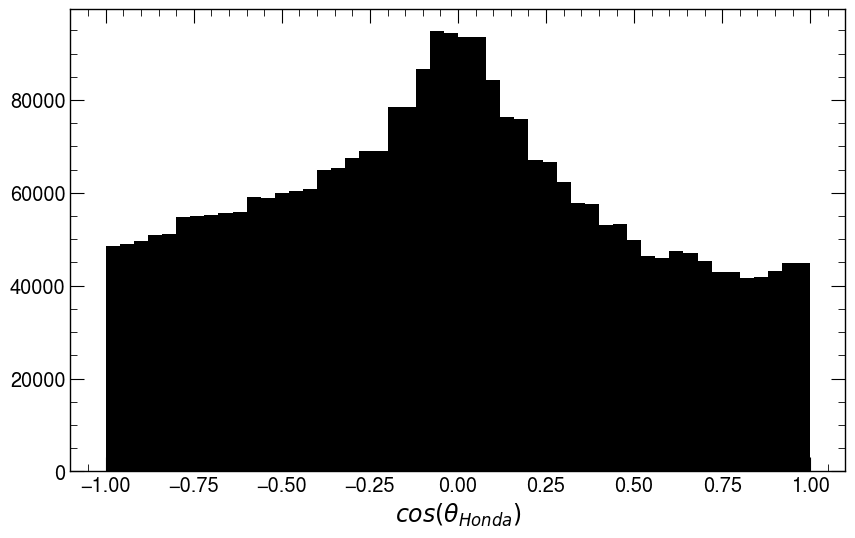

In [55]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
ax.hist(np.cos(plot_dirdetc_nu_phiHondaIso[:,1]), bins = 50, label = ' # Events')
ax.set_xlabel(r'$cos(\theta_{Honda})$', fontsize = 17)
#ax.set_xticks([0.0,0.78539,1.570,2.356,3.14159])
#ax.set_xticklabels([0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
#fig.colorbar(h[3], ax=ax)
#plt.title(r'Uniform $\phi$ Distribution to try to reproduce a Bartol Scenario')
#plt.savefig('AngularStudiesPlots/DirectionDetector_Atmospherics_HondaCoordSys_CosTheta.pdf', format='pdf', dpi=300)
#plt.savefig('AngularStudiesPlots/DirectionDetector_Atmospherics_HondaCoordSys_CosTheta.png', format='png', dpi=300)
plt.show()

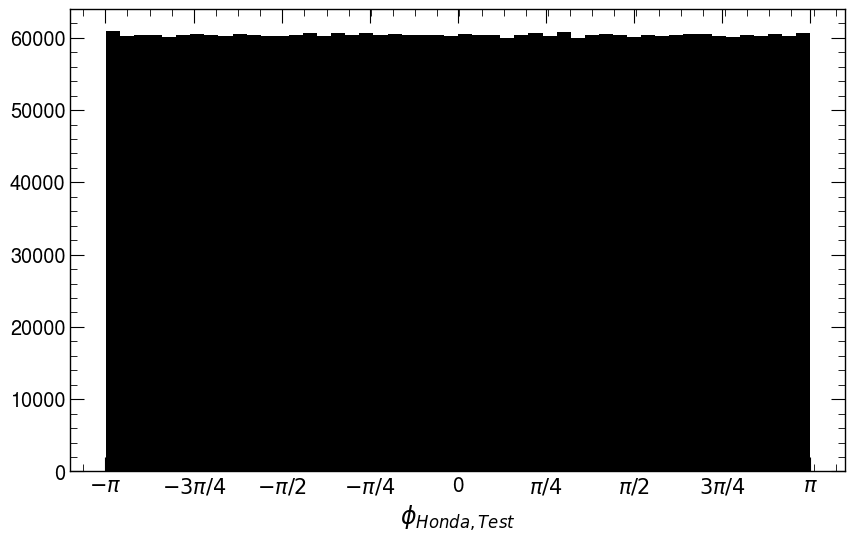

In [56]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
ax.hist(plot_dirdetc_nu_phiHondaIso[:,0], bins = 50, label = ' # Events')
ax.set_xlabel(r'$\phi_{Honda, Test}$', fontsize = 17)
ax.set_xticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
#fig.colorbar(h[3], ax=ax)
plt.show()

In [57]:
hist_cos_HondaCoordSys_PhiUnif = []
for index, atmevt in enumerate(plot_dirdetc_nu_phiHondaIso):
    indices = np.random.randint(0, len(PlotSunDirection), size=1)
    # Use the sampled indices to select elements from the array
    sample_sunpos = PlotSunDirection[indices]
    #print(sample_sunpos[0])
    for sunpos in sample_sunpos:
        hist_cos_HondaCoordSys_PhiUnif.append(cosineAngle_wSphericalUnitVec(atmevt,sample_sunpos[0]))


In [64]:
plot_dirdetc_nu_phiHondaIso

array([[ 0.2175936 ,  2.15504988],
       [-2.98432237,  1.64715877],
       [ 2.93275043,  1.40804613],
       ...,
       [-0.59481734,  0.99540215],
       [ 2.54796357,  1.76378266],
       [-1.49378315,  2.39475744]])

In [58]:
hist_cos_HondaCoordSys_PhiUnif = []
    
for idx, sample_sunpos in enumerate(PlotSunDirection):
    atmevt = plot_dirdetc_nu_phiHondaIso[idx]
    print(sample_sunpos,atmevt)
    hist_cos_HondaCoordSys_PhiUnif.append(cosineAngle_wSphericalUnitVec(atmevt, sample_sunpos))
            

[-1.88941153  1.85411547] [0.2175936  2.15504988]
[1.38189977 0.98107312] [-2.98432237  1.64715877]
[-1.4070894   1.74855499] [2.93275043 1.40804613]
[0.29640575 1.14223353] [0.62742716 1.83776234]
[-1.51504967  1.04103314] [-1.79752346  1.70720904]
[-0.73384185  1.37338357] [-0.03266146  1.69895123]
[-1.85285653  1.49404469] [-2.38630911  2.18795952]
[0.99202829 1.36786844] [1.3427789  1.39811674]
[-1.45364944  0.87483173] [1.99752894 1.70009759]
[-1.74577099  1.73566724] [1.60898607 1.19840868]
[2.76094605 2.74557893] [-2.46973009  1.65862601]
[2.4112815  1.97083938] [1.88310503 1.87520476]
[3.05088631 2.10101036] [-1.03200101  1.62812998]
[2.33809793 1.72464047] [-2.4585489   1.95176962]
[-3.01607676  2.08974788] [-2.89873362  2.8295453 ]
[-0.81732839  1.36770304] [1.56415945 1.79465784]
[2.27708648 2.3820253 ] [-0.61967707  1.01297993]
[1.68302621 1.31276143] [-1.39934763  2.01032658]
[1.45021425 1.75724674] [2.45313965 1.26411404]
[0.02622632 1.04287356] [-2.86651392  2.57229382]


In [59]:
PlotSunDirection

array([[-1.88941153,  1.85411547],
       [ 1.38189977,  0.98107312],
       [-1.4070894 ,  1.74855499],
       ...,
       [ 2.5553496 ,  2.67027331],
       [-0.79295177,  1.11803978],
       [ 1.73815921,  1.17686672]])

In [60]:
hist_cos_HondaCoordSys_PhiUnif

[-0.2549588553357607,
 -0.32359036507957684,
 -0.3821723687450586,
 0.7200847513723986,
 0.752309567343413,
 0.7180298168071568,
 0.6557701100083179,
 0.9407938443735316,
 -0.8075174261259619,
 -0.9577490944723565,
 0.2712861678857552,
 0.8756880212144105,
 -0.4780937200686737,
 0.1341792038909709,
 0.736771873273276,
 -0.7369316628333632,
 -0.9506402224983074,
 -0.9820410878522337,
 0.4478930737322764,
 -0.8755995062329127,
 0.7389913801581092,
 0.14034265389779954,
 -0.8179619217611052,
 0.8605673430730217,
 -0.03263063515789111,
 0.7993796537851654,
 -0.21070756331088678,
 0.9720214522782921,
 0.15039706394653618,
 -0.88008886019937,
 0.5885520060268584,
 0.1461206957149181,
 -0.07228039822574048,
 0.07043253054634147,
 0.03522135114229033,
 -0.2202668289737082,
 -0.13035818335038718,
 0.8858084730382756,
 -0.317399446445917,
 0.2713553588302889,
 0.5432792257915343,
 0.7921105459359997,
 0.3348885112756397,
 -0.7526382483782208,
 -0.7693099638897747,
 -0.5982395601110597,
 -0.98088

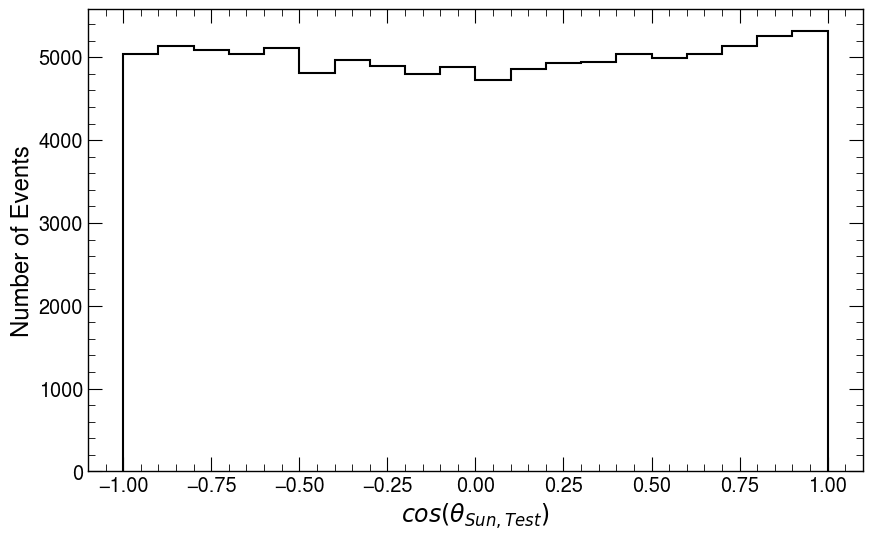

In [63]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
plt.hist(hist_cos_HondaCoordSys_PhiUnif, bins = 20,histtype = 'step')
#plt.title(f'index number evt: {index}')
plt.ylabel('Number of Events')
plt.xlabel(r'$cos(\theta_{Sun, Test})$',fontsize = 17)
#plt.title(r'Uniform $\phi$ Distribution to try to reproduce a Bartol Scenario w.r.t Sun')
#plt.savefig('AngularStudiesPlots/Atmospherics_HondaCoordSys_CosTheta_wrtSun_IsoFakePhiHonda_20bins.png', format='png', dpi=300)
#plt.savefig('AngularStudiesPlots/Atmospherics_HondaCoordSys_CosTheta_wrtSun_IsoFakePhiHonda_20bins.pdf', format='pdf', dpi=300)
plt.show()

### Distributions of the θ and φ angle difference in the two cases (original Honda and symmetrised one).
#### Distribution of the $\theta$ is the same for both.

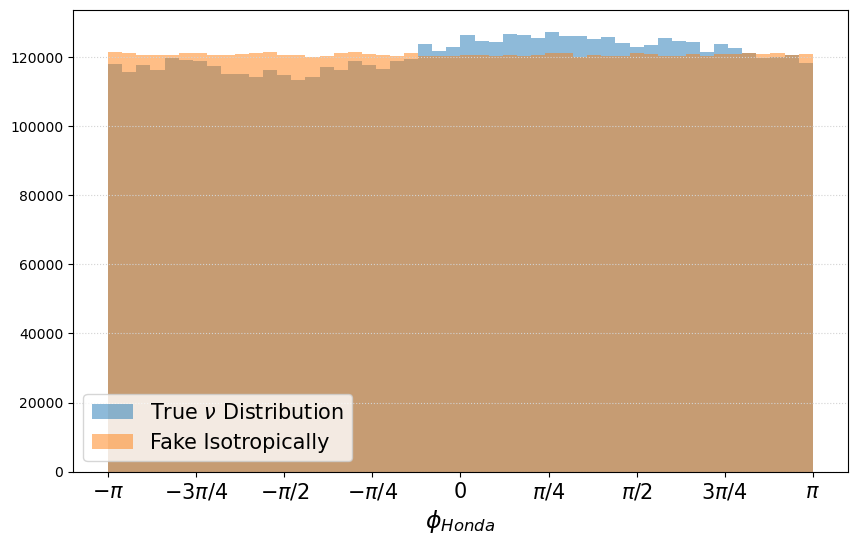

In [22]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
ax.hist(plot_dirdetc_nu[:,0], bins = 50,alpha = 0.5, label = r'True $\nu$ Distribution')
ax.hist(plot_dirdetc_nu_phiHondaIso[:,0], bins = 50,alpha = 0.5, label = 'Fake Isotropically')
ax.set_xlabel(r'$\phi_{Honda}$', fontsize = 17)
ax.set_xticks([-3.14559,-2.356,-1.570,-0.78539,0.0,0.78539,1.570,2.356,3.14159])
ax.set_xticklabels([r'$-\pi$',r'$ -3\pi / 4$', r'$-\pi / 2$', r'$-\pi / 4$',0,r'$\pi / 4$',r'$\pi / 2$', r'$3 \pi / 4$', r'$\pi$'], fontsize = 15)
plt.legend(loc= 'lower left', fontsize=15)
ax.grid(axis='y', color='lightgray', linestyle=':')
#fig.colorbar(h[3], ax=ax)
#plt.title('Atmospherics_'+list_nuclearmodels[SAMPLE_INDEX])
plt.savefig('AngularStudiesPlots/Comparision_Atmospherics_Phi_FakeAndReco.png', format='png', dpi=300)
plt.savefig('AngularStudiesPlots/Comparision_Atmospherics_Phi_FakeAndReco.pdf', format='pdf', dpi=300)
plt.show()

### Superimpose the distribution of the sun/neutrino angle cosine in the two case in the same plot, to make it easier to estimate the difference (with horizontal grid, something like ax.grid(axis='y', color='lightgray', linestyle=':'))

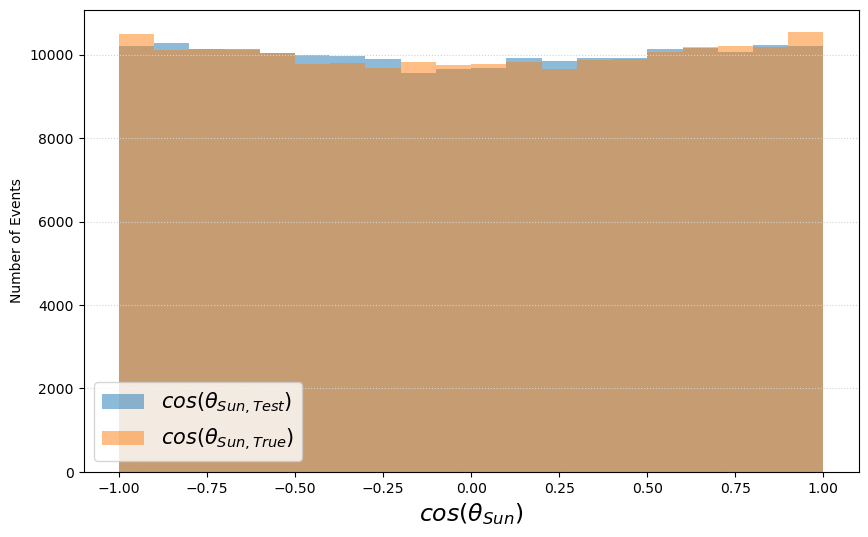

In [23]:
fig, ax = plt.subplots(dpi=100, figsize=(10, 6))
plt.hist(hist_cos_HondaCoordSys_PhiUnif, bins = 20, alpha=0.5, label= r'$cos(\theta_{Sun, Test})$')
plt.hist(hist_cos_HondaCoordSys, bins = 20, alpha=0.5, label = r'$cos(\theta_{Sun, True})$')
plt.legend(loc = 'lower left', fontsize = 15)
ax.grid(axis='y', color='lightgray', linestyle=':')
#plt.title(f'index number evt: {index}')
plt.ylabel('Number of Events')
plt.xlabel(r'$cos(\theta_{Sun})$',fontsize = 17)
plt.savefig('AngularStudiesPlots/Comparision_Atmospherics_CosSun_wHondaPhi_FakeAndReco.png', format='png', dpi=300)

plt.show()